# Análise de Dados Enem 2018
O objetivo dessa análise exploratória é verificar as notas de matemática e redação dos inscritos no enem de acordo com fatores sociais

### Base de dados:
http://portal.inep.gov.br/web/guest/microdados


In [2]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import os
from IPython.display import Image

In [3]:
#Definindo diretórios 
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')
ANALISE_DIR = os.path.join(BASE_DIR, 'analise')

In [3]:
conda info --envs

# conda environments:
#
base                     C:\Users\rebec\anaconda3
programaria-env       *  C:\Users\rebec\anaconda3\envs\programaria-env


Note: you may need to restart the kernel to use updated packages.


In [4]:
#Como a planilha é muito grande, iremos selecionar somente essas colunas
colunas = ['NU_INSCRICAO','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA',
           'IN_GESTANTE','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002','Q006','Q025','Q027']

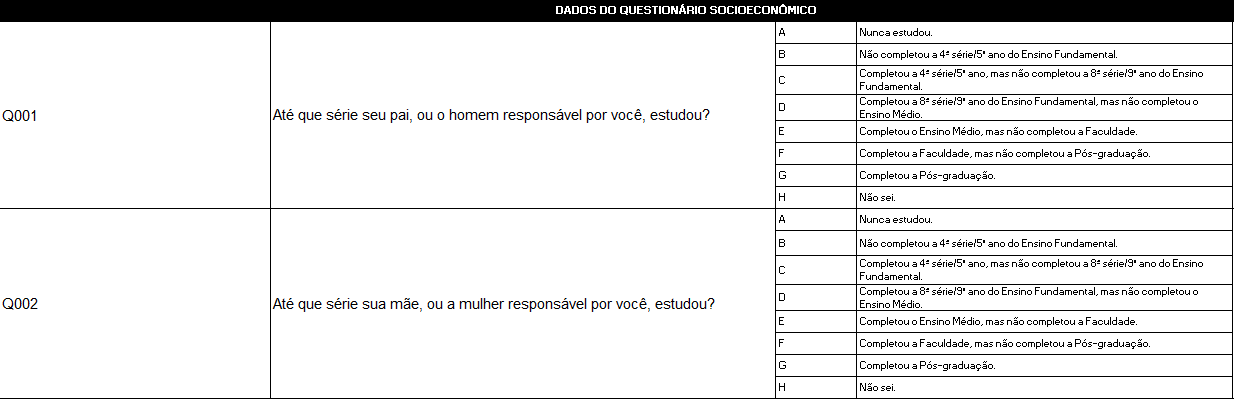

In [13]:
#Dicionario de dados 
Image(os.path.join(DATA_DIR,"dictdados1.png"))

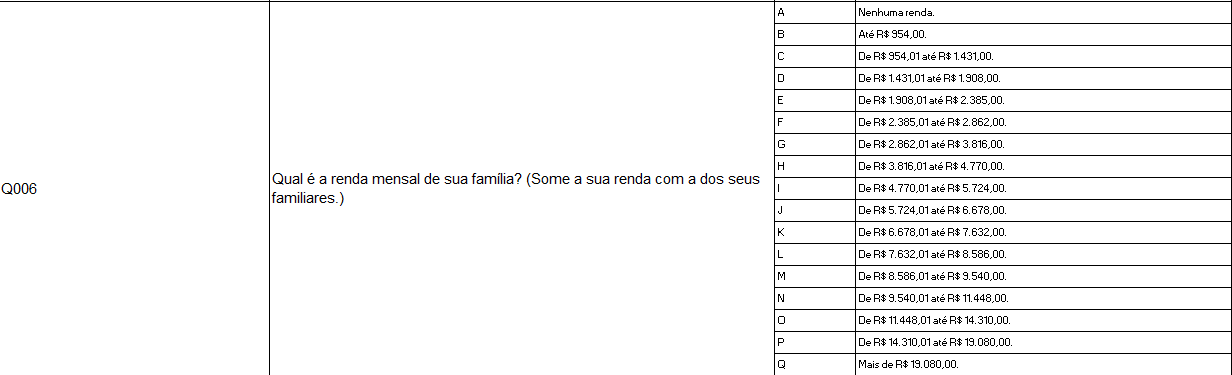

In [14]:
Image(os.path.join(DATA_DIR,"dictdados2.png"))

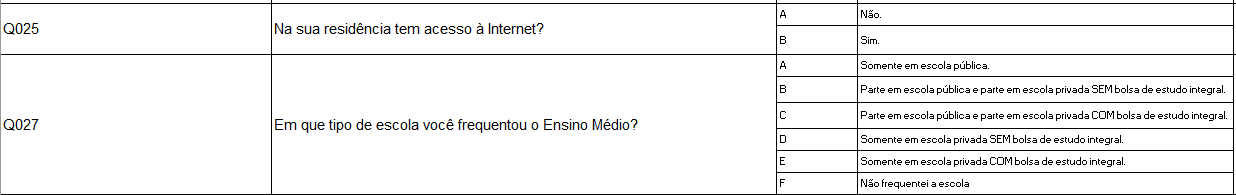

In [15]:
Image(os.path.join(DATA_DIR,"dictdados3.png"))

In [5]:
df = pd.read_csv(os.path.join(DATA_DIR, 'MICRODADOS_ENEM_2018.csv'), sep=';', encoding='ISO-8859-1', usecols=colunas)

In [7]:
df.head()

,NU_INSCRICAO,NU_ANO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,IN_GESTANTE,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,Q027
0,180008202043,2018,DF,44.0,M,1,0,NaN,NaN,A,A,A,A,A
1,180007197856,2018,MA,23.0,F,3,0,480.3,280.0,B,B,B,A,A
2,180008517434,2018,SP,23.0,F,1,0,NaN,NaN,E,E,C,B,A
3,180007661228,2018,BA,26.0,F,3,0,NaN,NaN,B,C,B,B,A
4,180008787987,2018,BA,20.0,M,0,0,NaN,360.0,C,E,B,B,A


### Limpeza dos dados

In [50]:
df['NU_IDADE'] = df['NU_IDADE'].astype(int)

In [51]:
df.isna().sum()

NU_INSCRICAO        0
NU_ANO              0
SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_SEXO             0
TP_COR_RACA         0
IN_GESTANTE         0
NU_NOTA_MT          0
NU_NOTA_REDACAO     0
Q001                0
Q002                0
Q006                0
Q025                0
Q027                0
dtype: int64

In [52]:
#Dropo meu dados NaN
df.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_IDADE'], axis=0, inplace=True)

In [53]:
#Verifico duplicadas
df.duplicated().sum()

0

### Análise Geral

In [62]:
#Porcentagem de participantes por idade
perc_idade = (df['NU_IDADE'].value_counts()/df.shape[0])*100
perc_idade

17    19.348245
18    19.034916
19    11.597744
20     7.510753
16     6.980328
        ...    
87     0.000051
83     0.000051
84     0.000026
86     0.000026
90     0.000026
Name: NU_IDADE, Length: 79, dtype: float64

In [75]:
# Mais de 60% dos canditados tem entre 16 e 20 anos
soma = 0
for k, v in perc_idade.items():
    if k >= 16 and k <= 20:
        soma += v
print('%.2f%%' % soma)

64.47%


In [68]:
#Porcentagem de participantes por UF
(df['SG_UF_RESIDENCIA'].value_counts()/df.shape[0])*100


SP    16.415974
MG    10.919746
BA     7.427772
RJ     6.787733
CE     5.954458
PE     5.498179
PA     5.382427
RS     4.304806
PR     4.218641
MA     4.167378
GO     3.431440
PB     2.926313
PI     2.377448
RN     2.336433
SC     2.254068
ES     2.052459
AM     1.970351
DF     1.882594
AL     1.709518
MT     1.629131
SE     1.426392
MS     1.234850
RO     1.093467
TO     0.978408
AP     0.701164
AC     0.683674
RR     0.235177
Name: SG_UF_RESIDENCIA, dtype: float64

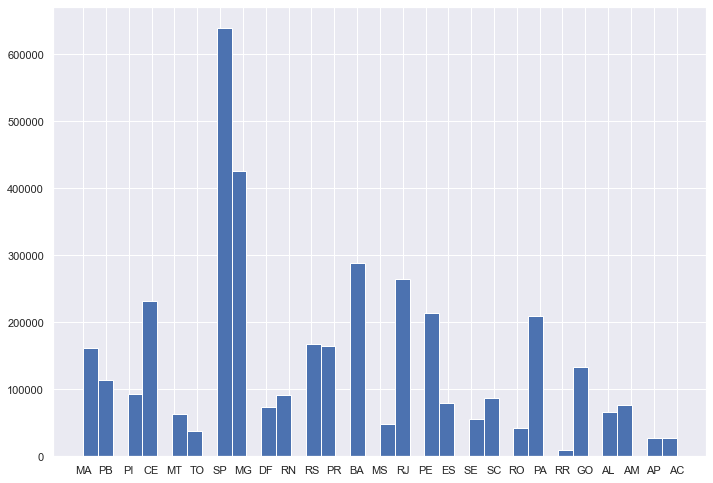

In [83]:
df['SG_UF_RESIDENCIA'].hist(bins=40)

In [77]:
#Número de gestantes
df['IN_GESTANTE'].value_counts()

0    3893160
1        511
Name: IN_GESTANTE, dtype: int64

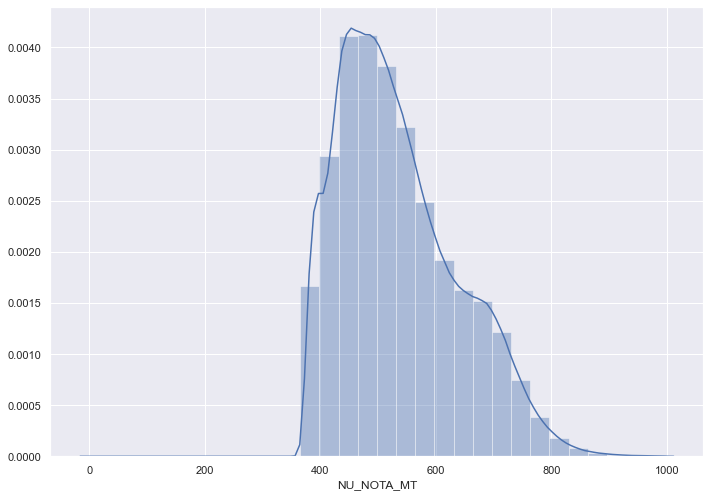

In [9]:
#Plotando a distribuição da váriavel target nota matemática
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['NU_NOTA_MT'], bins=30)
plt.show()

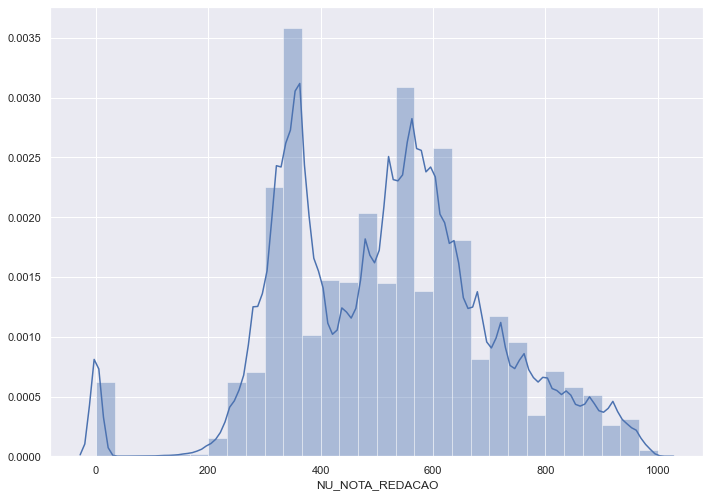

In [10]:
#Plotando a distribuição da váriavel target nota redação
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['NU_NOTA_REDACAO'], bins=30)
plt.show()

### Análise por Sexo

(-1.111477136056653, 1.100546530288412, -1.1218875872954417, 1.113319713861763)

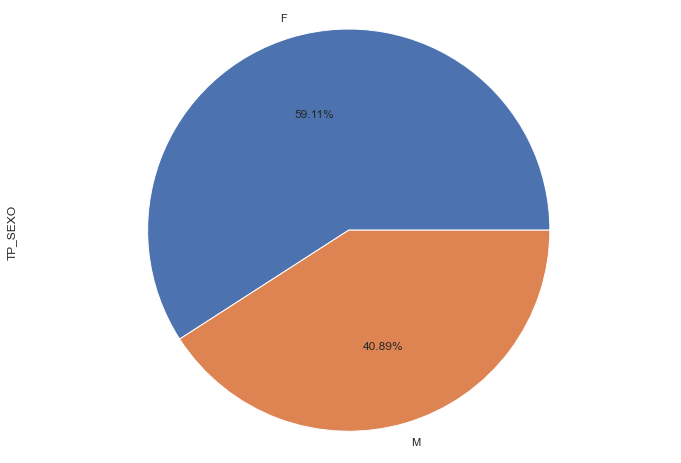

In [66]:
#Porcentagem de pessoas por sexo
df['TP_SEXO'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo

### Análise por Raça

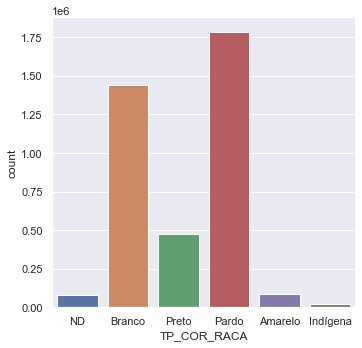

In [74]:
#Quantidade de pessoas por raça
raca_map = {0: 'ND', 1: 'Branco', 2: 'Preto', 3: 'Pardo', 4: 'Amarelo', 5: 'Indígena'}
sns.catplot('TP_COR_RACA',data=df, kind='count').set_xticklabels(raca_map.values())